In [1]:
# import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
# load the extracted feature dataset
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = 'convNet-2-dog-w-augment-2021-07-21/'

# uncompressed: uncompressed_features_rotations.csv
# pca compressed: pca_compressed_features_rotations.csv
# vae compressed: VAE-1_compressed_features_rotations.csv

feature_path = path + pred_save_path + "uncompressed_features_rotations.csv"
#print(feature_path)

feature_data = pd.read_csv(feature_path, sep = "\t", index_col = 0)
#feature_data = feature_data.dropna(axis='columns')

print("dimension of the input data: ", feature_data.shape)
feature_data.head(5)

dimension of the input data:  (544, 6275)


,0,1,2,3,4,5,6,7,8,9,...,6265,6266,6267,6268,6269,6270,6271,Day,Dog_label,Area_mm2
-01-CON-D00-L.png,0.0,0.0,0.016211,0.0,0.291995,0.000000,0.146432,0.0,0.021637,0.117324,...,0.0,0.000000,0.324561,0.0,0.0,0.0,0.0,0.0,1,501.551020
-01-CON-D02-L.png,0.0,0.0,0.000000,0.0,0.438584,0.000000,0.967646,0.0,0.000000,0.000000,...,0.0,0.205997,0.347459,0.0,0.0,0.0,0.0,2.0,1,615.610652
-01-CON-D04-L.png,0.0,0.0,0.000000,0.0,0.637421,0.110172,0.361000,0.0,0.055045,0.000000,...,0.0,0.100205,0.396896,0.0,0.0,0.0,0.0,4.0,1,629.405482
-01-CON-D07-L.png,0.0,0.0,0.000000,0.0,0.575340,0.025159,0.322484,0.0,0.129195,0.000000,...,0.0,0.300293,0.549061,0.0,0.0,0.0,0.0,7.0,1,550.342936
-01-CON-D09-L.png,0.0,0.0,0.000000,0.0,0.389240,0.000000,0.784625,0.0,0.000000,0.000000,...,0.0,0.182934,0.308662,0.0,0.0,0.0,0.0,9.0,1,470.905718


In [3]:
# load the extracted feature dataset
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = 'convNet-dog-w-augment-2021-07-20/'

# uncompressed: uncompressed_features_rotations.csv
# pca compressed: pca_compressed_features_rotations.csv
# vae compressed: VAE-1_compressed_features_rotations.csv

feature_path = path + pred_save_path + "pca_compressed_features_rotations.csv"
#print(feature_path)

feature_data = pd.read_csv(feature_path, sep = "\t", index_col = 0)
#feature_data = feature_data.dropna(axis='columns')

print("dimension of the input data: ", feature_data.shape)
feature_data.head(5)

dimension of the input data:  (544, 407)


,0,1,2,3,4,5,6,7,8,9,...,397,398,399,400,401,402,403,Day,Dog_label,Area_mm2
-01-CON-D00-L.png,-3.979557,0.698825,1.203087,-0.535264,-1.890078,0.294163,1.121049,-1.426661,-0.098390,-0.814226,...,-0.578288,-0.917540,0.512298,-0.404714,-0.835545,0.229360,-0.719140,0.0,1,532.897959
-01-CON-D02-L.png,8.799985,-7.650667,0.272456,-2.753600,-2.936583,0.552569,-6.283830,-4.663805,-0.632521,-3.088811,...,-0.054805,0.024469,0.103730,-0.001665,-0.082493,0.013053,-0.022224,2.0,1,623.140496
-01-CON-D04-L.png,8.950510,-1.105826,-2.063591,0.442043,-4.903593,-0.169145,1.153689,2.698774,-3.902998,-1.286893,...,-0.099741,0.206386,0.118824,-0.223728,-0.003638,-0.318956,0.036588,4.0,1,630.687077
-01-CON-D07-L.png,7.881119,1.227364,-5.288356,6.527982,-6.353482,-5.798431,-0.372025,3.375364,-2.216100,-0.438905,...,-0.208860,0.456164,0.045903,-0.008145,-0.009034,-0.078547,0.111962,7.0,1,528.806584
-01-CON-D09-L.png,10.689676,-7.416644,2.033650,1.030600,-1.913250,-0.282226,-0.125614,-7.895992,0.514606,-3.844703,...,0.001314,0.032731,-0.055784,0.023959,-0.028428,-0.044563,-0.019482,9.0,1,476.235453


In [4]:
feature_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '397', '398', '399', '400', '401', '402', '403', 'Day', 'Dog_label',
       'Area_mm2'],
      dtype='object', length=407)

In [5]:
feature_data.index

Index(['-01-CON-D00-L.png', '-01-CON-D02-L.png', '-01-CON-D04-L.png',
       '-01-CON-D07-L.png', '-01-CON-D09-L.png', '-01-CON-D11-L.png',
       '-01-CON-D14-L.png', '-01-CON-D16-L.png', '-01-CON-D18-L.png',
       '-01-CON-D21-L.png',
       ...
       'rotate90-10-CON-D04-R.png', 'rotate90-10-CON-D07-R.png',
       'rotate90-10-CON-D09-R.png', 'rotate90-10-CON-D11-R.png',
       'rotate90-10-CON-D14-R.png', 'rotate90-10-CON-D16-R.png',
       'rotate90-10-CON-D18-R.png', 'rotate90-10-CON-D21-R.png',
       'rotate90-10-CON-D23-R.png', 'rotate90-10-CON-D25-R.png'],
      dtype='object', length=544)

In [6]:
feature_data.Dog_label.value_counts()

1     60
2     60
3     60
4     60
5     56
9     56
6     48
7     48
8     48
10    48
Name: Dog_label, dtype: int64

In [7]:
wound_area_df = feature_data[['Day', 'Dog_label', 'Area_mm2']]

for label in set(wound_area_df.Dog_label):
    #print(label)
    temp = wound_area_df[wound_area_df.Dog_label == label]['Area_mm2'].iloc[0]
    wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_mm2'] / temp

/tmp/ipykernel_3202991/3794090581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_mm2'] / temp


In [8]:
# Add the Area_precentage column back to feature dataset as a feature
feature_data['Area_precentage'] = wound_area_df['Area_precentage'].values
feature_data

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,Day,Dog_label,Area_mm2,Area_precentage
-01-CON-D00-L.png,-3.979557,0.698825,1.203087,-0.535264,-1.890078,0.294163,1.121049,-1.426661,-0.098390,-0.814226,...,-0.917540,0.512298,-0.404714,-0.835545,0.229360,-0.719140,0.0,1,532.897959,1.000000
-01-CON-D02-L.png,8.799985,-7.650667,0.272456,-2.753600,-2.936583,0.552569,-6.283830,-4.663805,-0.632521,-3.088811,...,0.024469,0.103730,-0.001665,-0.082493,0.013053,-0.022224,2.0,1,623.140496,1.169343
-01-CON-D04-L.png,8.950510,-1.105826,-2.063591,0.442043,-4.903593,-0.169145,1.153689,2.698774,-3.902998,-1.286893,...,0.206386,0.118824,-0.223728,-0.003638,-0.318956,0.036588,4.0,1,630.687077,1.183504
-01-CON-D07-L.png,7.881119,1.227364,-5.288356,6.527982,-6.353482,-5.798431,-0.372025,3.375364,-2.216100,-0.438905,...,0.456164,0.045903,-0.008145,-0.009034,-0.078547,0.111962,7.0,1,528.806584,0.992322
-01-CON-D09-L.png,10.689676,-7.416644,2.033650,1.030600,-1.913250,-0.282226,-0.125614,-7.895992,0.514606,-3.844703,...,0.032731,-0.055784,0.023959,-0.028428,-0.044563,-0.019482,9.0,1,476.235453,0.893671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotate90-10-CON-D16-R.png,-5.098853,1.500281,-1.326878,-2.284112,0.945030,-5.951977,0.636958,-0.862498,-0.923928,-2.368094,...,-0.636517,0.136936,-0.161171,0.499262,-0.972255,-0.402906,16.0,10,78.114187,0.128275
rotate90-10-CON-D18-R.png,-4.733955,2.419480,-1.106264,-2.421438,-1.150180,-5.477267,1.716070,-1.610655,0.608819,-0.729589,...,0.140356,-0.781385,0.782499,0.175056,-1.482024,0.073253,18.0,10,50.236244,0.082495
rotate90-10-CON-D21-R.png,-6.206416,-0.367213,-1.329487,-2.281084,0.505521,-4.149320,1.832026,-0.454211,0.582477,-1.957041,...,0.218337,-0.132794,-0.175453,-0.153666,-0.254123,0.604041,21.0,10,33.306122,0.054693
rotate90-10-CON-D23-R.png,-6.417570,-1.795200,-1.006678,-0.320959,1.016383,-0.514877,1.097637,0.347069,0.571307,-0.669769,...,-0.912368,-0.382067,0.628334,0.593685,-0.524361,0.071756,23.0,10,23.615917,0.038781


# clinical data until heal data

In [9]:
clinical_path = './data/all_dog_wounds_noAugmentation/'
clinical_df = pd.read_csv(clinical_path+"wound_image_labels.csv")

print(clinical_df.loc[:,'Days_until_heal'])

0      37
1      35
2      33
3      30
4      28
       ..
131     9
132     7
133     4
134     2
135     0
Name: Days_until_heal, Length: 136, dtype: int64


In [10]:
wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4
#print(clinical_df.loc[:,'Days_until_heal'])

fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

/tmp/ipykernel_3202991/363155894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4


In [11]:
print(wound_area_df[wound_area_df.Dog_label == 5])
#print(wound_area_df[wound_area_df.Dog_label == 6])

                             Day  Dog_label    Area_mm2  Area_precentage  \
-05-CON-D02-L.png            2.0          5  714.080000         1.000000   
-05-CON-D04-L.png            4.0          5  664.803805         0.930993   
-05-CON-D07-L.png            7.0          5  493.066406         0.690492   
-05-CON-D09-L.png            9.0          5  233.457778         0.326935   
-05-CON-D11-L.png           11.0          5  113.848889         0.159434   
-05-CON-D14-L.png           14.0          5   49.826389         0.069777   
-05-CON-D16-L.png           16.0          5   32.979592         0.046185   
-05-CON-D18-L.png           18.0          5   22.328889         0.031269   
-05-CON-D21-L.png           21.0          5    9.574200         0.013408   
-05-CON-D23-L.png           23.0          5    0.000000         0.000000   
-05-CON-D25-L.png           25.0          5    0.000000         0.000000   
-05-CON-D28-L.png           28.0          5    0.000000         0.000000   
-05-CON-D30-

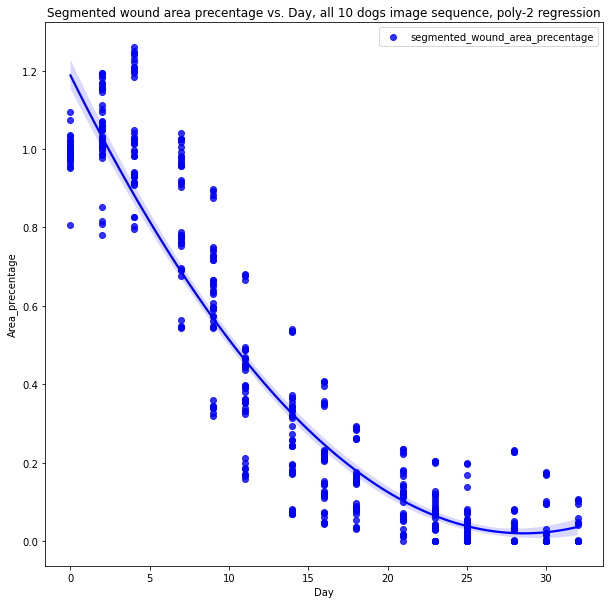

In [12]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Day', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Day, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

fig.savefig(fig_path + "Segmented wound area precentage vs. Day, all 10 dogs image sequence.png")

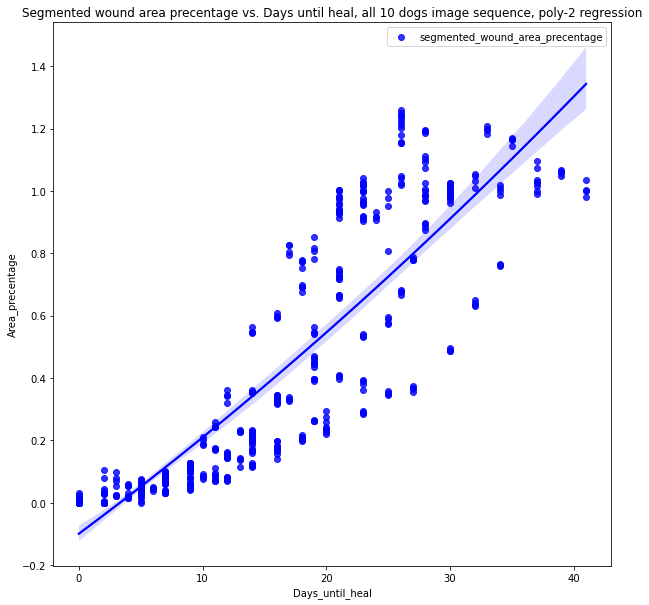

In [13]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Days_until_heal', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

fig.savefig(fig_path + "Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence.png")

## Separate training and test data set
1. Try use dog 9 and 10 as separate test image sequence
2. Try use the < 15 days image sequence as training input and > 15 days image sequence as test input (Tried, not working)


In [14]:
# manually set the random seed to define a replication
r_seed = 42

# manually set the number for cross validation
num_cv = 5

# manually set the test dog wound image sequences (9 or 10)
# [9, 10]
test_num = [9, 10]

print("current random seed is: ", r_seed)
print("current test wound image sequence is: ", test_num)

current random seed is:  42
current test wound image sequence is:  [9, 10]


In [15]:
# now combining feature data with class_feature.csv(fibrin, granulation, necrosis) that are extracted from model-1.
feature_data

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,Day,Dog_label,Area_mm2,Area_precentage
-01-CON-D00-L.png,-3.979557,0.698825,1.203087,-0.535264,-1.890078,0.294163,1.121049,-1.426661,-0.098390,-0.814226,...,-0.917540,0.512298,-0.404714,-0.835545,0.229360,-0.719140,0.0,1,532.897959,1.000000
-01-CON-D02-L.png,8.799985,-7.650667,0.272456,-2.753600,-2.936583,0.552569,-6.283830,-4.663805,-0.632521,-3.088811,...,0.024469,0.103730,-0.001665,-0.082493,0.013053,-0.022224,2.0,1,623.140496,1.169343
-01-CON-D04-L.png,8.950510,-1.105826,-2.063591,0.442043,-4.903593,-0.169145,1.153689,2.698774,-3.902998,-1.286893,...,0.206386,0.118824,-0.223728,-0.003638,-0.318956,0.036588,4.0,1,630.687077,1.183504
-01-CON-D07-L.png,7.881119,1.227364,-5.288356,6.527982,-6.353482,-5.798431,-0.372025,3.375364,-2.216100,-0.438905,...,0.456164,0.045903,-0.008145,-0.009034,-0.078547,0.111962,7.0,1,528.806584,0.992322
-01-CON-D09-L.png,10.689676,-7.416644,2.033650,1.030600,-1.913250,-0.282226,-0.125614,-7.895992,0.514606,-3.844703,...,0.032731,-0.055784,0.023959,-0.028428,-0.044563,-0.019482,9.0,1,476.235453,0.893671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotate90-10-CON-D16-R.png,-5.098853,1.500281,-1.326878,-2.284112,0.945030,-5.951977,0.636958,-0.862498,-0.923928,-2.368094,...,-0.636517,0.136936,-0.161171,0.499262,-0.972255,-0.402906,16.0,10,78.114187,0.128275
rotate90-10-CON-D18-R.png,-4.733955,2.419480,-1.106264,-2.421438,-1.150180,-5.477267,1.716070,-1.610655,0.608819,-0.729589,...,0.140356,-0.781385,0.782499,0.175056,-1.482024,0.073253,18.0,10,50.236244,0.082495
rotate90-10-CON-D21-R.png,-6.206416,-0.367213,-1.329487,-2.281084,0.505521,-4.149320,1.832026,-0.454211,0.582477,-1.957041,...,0.218337,-0.132794,-0.175453,-0.153666,-0.254123,0.604041,21.0,10,33.306122,0.054693
rotate90-10-CON-D23-R.png,-6.417570,-1.795200,-1.006678,-0.320959,1.016383,-0.514877,1.097637,0.347069,0.571307,-0.669769,...,-0.912368,-0.382067,0.628334,0.593685,-0.524361,0.071756,23.0,10,23.615917,0.038781


In [16]:
class_feature = pd.read_csv('/home/aravind/Desktop/Aravind/smart_bandage/smart_bandage/Aravind/class_features.csv',index_col=None)
class_feature.drop(columns=['total'], inplace=True)
class_feature.sort_values(by=['image_name'],inplace=True,ignore_index=True)
class_feature

,Not_wound,Fibrin,Granulation,Necrosed,image_name
0,0.741798,0.183237,0.041212,0.033755,01-CON-D00-L.jpg
1,0.840166,0.097424,0.043218,0.019193,01-CON-D02-L.JPG
2,0.864317,0.117976,0.013426,0.004281,01-CON-D04-L.JPG
3,0.804517,0.111475,0.072172,0.011838,01-CON-D07-L.JPG
4,0.833030,0.092023,0.069762,0.005185,01-CON-D09-L.JPG
...,...,...,...,...,...
131,0.752738,0.176545,0.042196,0.028522,10-CON-D16-R.JPG
132,0.756946,0.183178,0.037439,0.022437,10-CON-D18-R.JPG
133,0.784885,0.158791,0.032941,0.023383,10-CON-D21-R.JPG
134,0.780616,0.173160,0.025812,0.020411,10-CON-D23-R.JPG


In [17]:
feature_data['Not_wound'] = list(class_feature['Not_wound'].values)*4
feature_data['Fibrin'] = list(class_feature['Fibrin'].values)*4
feature_data['Granulation'] = list(class_feature['Granulation'].values)*4
feature_data['Necrosed'] = list(class_feature['Necrosed'].values)*4

In [18]:
feature_data

,0,1,2,3,4,5,6,7,8,9,...,402,403,Day,Dog_label,Area_mm2,Area_precentage,Not_wound,Fibrin,Granulation,Necrosed
-01-CON-D00-L.png,-3.979557,0.698825,1.203087,-0.535264,-1.890078,0.294163,1.121049,-1.426661,-0.098390,-0.814226,...,0.229360,-0.719140,0.0,1,532.897959,1.000000,0.741798,0.183237,0.041212,0.033755
-01-CON-D02-L.png,8.799985,-7.650667,0.272456,-2.753600,-2.936583,0.552569,-6.283830,-4.663805,-0.632521,-3.088811,...,0.013053,-0.022224,2.0,1,623.140496,1.169343,0.840166,0.097424,0.043218,0.019193
-01-CON-D04-L.png,8.950510,-1.105826,-2.063591,0.442043,-4.903593,-0.169145,1.153689,2.698774,-3.902998,-1.286893,...,-0.318956,0.036588,4.0,1,630.687077,1.183504,0.864317,0.117976,0.013426,0.004281
-01-CON-D07-L.png,7.881119,1.227364,-5.288356,6.527982,-6.353482,-5.798431,-0.372025,3.375364,-2.216100,-0.438905,...,-0.078547,0.111962,7.0,1,528.806584,0.992322,0.804517,0.111475,0.072172,0.011838
-01-CON-D09-L.png,10.689676,-7.416644,2.033650,1.030600,-1.913250,-0.282226,-0.125614,-7.895992,0.514606,-3.844703,...,-0.044563,-0.019482,9.0,1,476.235453,0.893671,0.833030,0.092023,0.069762,0.005185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotate90-10-CON-D16-R.png,-5.098853,1.500281,-1.326878,-2.284112,0.945030,-5.951977,0.636958,-0.862498,-0.923928,-2.368094,...,-0.972255,-0.402906,16.0,10,78.114187,0.128275,0.752738,0.176545,0.042196,0.028522
rotate90-10-CON-D18-R.png,-4.733955,2.419480,-1.106264,-2.421438,-1.150180,-5.477267,1.716070,-1.610655,0.608819,-0.729589,...,-1.482024,0.073253,18.0,10,50.236244,0.082495,0.756946,0.183178,0.037439,0.022437
rotate90-10-CON-D21-R.png,-6.206416,-0.367213,-1.329487,-2.281084,0.505521,-4.149320,1.832026,-0.454211,0.582477,-1.957041,...,-0.254123,0.604041,21.0,10,33.306122,0.054693,0.784885,0.158791,0.032941,0.023383
rotate90-10-CON-D23-R.png,-6.417570,-1.795200,-1.006678,-0.320959,1.016383,-0.514877,1.097637,0.347069,0.571307,-0.669769,...,-0.524361,0.071756,23.0,10,23.615917,0.038781,0.780616,0.173160,0.025812,0.020411


In [19]:
wound_area_df

,Day,Dog_label,Area_mm2,Area_precentage,Days_until_heal
-01-CON-D00-L.png,0.0,1,532.897959,1.000000,37
-01-CON-D02-L.png,2.0,1,623.140496,1.169343,35
-01-CON-D04-L.png,4.0,1,630.687077,1.183504,33
-01-CON-D07-L.png,7.0,1,528.806584,0.992322,30
-01-CON-D09-L.png,9.0,1,476.235453,0.893671,28
...,...,...,...,...,...
rotate90-10-CON-D16-R.png,16.0,10,78.114187,0.128275,9
rotate90-10-CON-D18-R.png,18.0,10,50.236244,0.082495,7
rotate90-10-CON-D21-R.png,21.0,10,33.306122,0.054693,4
rotate90-10-CON-D23-R.png,23.0,10,23.615917,0.038781,2


In [20]:
feature_data = feature_data[['Not_wound', 'Fibrin', 'Granulation', 'Necrosed','Dog_label','Day']]

In [21]:
feature_data

,Not_wound,Fibrin,Granulation,Necrosed,Dog_label,Day
-01-CON-D00-L.png,0.741798,0.183237,0.041212,0.033755,1,0.0
-01-CON-D02-L.png,0.840166,0.097424,0.043218,0.019193,1,2.0
-01-CON-D04-L.png,0.864317,0.117976,0.013426,0.004281,1,4.0
-01-CON-D07-L.png,0.804517,0.111475,0.072172,0.011838,1,7.0
-01-CON-D09-L.png,0.833030,0.092023,0.069762,0.005185,1,9.0
...,...,...,...,...,...,...
rotate90-10-CON-D16-R.png,0.752738,0.176545,0.042196,0.028522,10,16.0
rotate90-10-CON-D18-R.png,0.756946,0.183178,0.037439,0.022437,10,18.0
rotate90-10-CON-D21-R.png,0.784885,0.158791,0.032941,0.023383,10,21.0
rotate90-10-CON-D23-R.png,0.780616,0.173160,0.025812,0.020411,10,23.0


In [22]:
# 1. use dog 9 and 10 as separate test image sequences, use dog 1-8 as training image sequences
#    Notice: dog 2 is a good example of chronic wound
#    Train data need to drop the Dog_label column, but save the Area_mm2 and Area_precentage columns as features
# Train
X_train = feature_data[feature_data['Dog_label'].isin(range(1,9))]
X_train = X_train.drop(['Dog_label'], axis = 1)
X_train = X_train.drop(['Day'], axis = 1)
print("The training dataset's shape is: ", X_train.shape)


#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
X_test = feature_data[feature_data['Dog_label'].isin(test_num)]
X_test = X_test.drop(['Dog_label'], axis = 1)
X_test = X_test.drop(['Day'], axis = 1)
print(X_test.shape)

# Label
Y_train = wound_area_df[wound_area_df['Dog_label'].isin(range(1,9))]
Y_train = Y_train['Days_until_heal']

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
Y_test = wound_area_df[wound_area_df['Dog_label'].isin(test_num)]
Y_test = Y_test['Days_until_heal']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 and 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
days_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Day']
print("The test wound image sequence's days:\n", days_seq)

#Area_prop_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Area_precentage']
Area_prop_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Area_precentage']
print("The test wound image sequence's Area proportion:\n", Area_prop_seq)

The training dataset's shape is:  (440, 4)
(104, 4)
The test wound image sequence's days:
 -09-CON-D00-R.png             0.0
-09-CON-D02-R.png             2.0
-09-CON-D04-R.png             4.0
-09-CON-D07-R.png             7.0
-09-CON-D09-R.png             9.0
                             ... 
rotate90-10-CON-D16-R.png    16.0
rotate90-10-CON-D18-R.png    18.0
rotate90-10-CON-D21-R.png    21.0
rotate90-10-CON-D23-R.png    23.0
rotate90-10-CON-D25-R.png    25.0
Name: Day, Length: 104, dtype: float64
The test wound image sequence's Area proportion:
 -09-CON-D00-R.png            1.000000
-09-CON-D02-R.png            1.071873
-09-CON-D04-R.png            1.221191
-09-CON-D07-R.png            1.024975
-09-CON-D09-R.png            0.729330
                               ...   
rotate90-10-CON-D16-R.png    0.128275
rotate90-10-CON-D18-R.png    0.082495
rotate90-10-CON-D21-R.png    0.054693
rotate90-10-CON-D23-R.png    0.038781
rotate90-10-CON-D25-R.png    0.025474
Name: Area_precentage, Lengt

In [23]:
X_train

,Not_wound,Fibrin,Granulation,Necrosed
-01-CON-D00-L.png,0.741798,0.183237,0.041212,0.033755
-01-CON-D02-L.png,0.840166,0.097424,0.043218,0.019193
-01-CON-D04-L.png,0.864317,0.117976,0.013426,0.004281
-01-CON-D07-L.png,0.804517,0.111475,0.072172,0.011838
-01-CON-D09-L.png,0.833030,0.092023,0.069762,0.005185
...,...,...,...,...
rotate90-08-CON-D16-L.png,0.768544,0.151081,0.051375,0.029001
rotate90-08-CON-D18-L.png,0.738529,0.172214,0.053575,0.035679
rotate90-08-CON-D21-L.png,0.751689,0.158993,0.057420,0.031898
rotate90-08-CON-D23-L.png,0.757108,0.153851,0.057946,0.031097


## XGBoost Regression
Define the XGBoost Regression object.

### Random search for XGB regressor

In [24]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [25]:
from xgboost.sklearn import XGBRegressor

rs = XGBRegressor(random_state=42, learning_rate =0.05, max_depth = 3, n_estimators = 30)
rs.fit(X_train, Y_train)

Y_pred = rs.predict(X_test)
Y_tpred = rs.predict(X_train)

from sklearn.metrics import r2_score

# OG: [0:14], 180 degree: [14:28], 270 degree: [28:42], 90 degree: [42:56]
#print(days_seq[14:28])

# Independent test images R2 score

print("Test set results are: ", r2_score(Y_test, Y_pred))

print("Train set results are: ", r2_score(Y_train, Y_tpred))


Test set results are:  0.04198682119435049
Train set results are:  0.6206325925548607


In [26]:
rs

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=30, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor

# Number of trees in random forest
n_estimators = [10,20,30]#[int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Maximum number of levels in tree
max_depth = [1,2,3]#[int(x) for x in np.linspace(1, 110, num = 60)]
#max_depth.append(None)

# Learning rate
learning_rate = [0.05, 0.01, 0.005, 0.001, 0.0005]

# Minimum sum of insatnce weight needed in a child
min_child_weight = [2,3, 4]

#l1 reg
alpha =[0.01, 0.02, 0.05, 0.09, 0.1, 0.2, 0.5]

gamma = [1,2,3,4,5,6,7]

colsample_bytree = [0.5,0.6,0.7,0.8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               #'min_child_weight': min_child_weight,
               #'alpha':alpha,
               #'gamma': gamma
               #'colsample_bytree':colsample_bytree
              }
print(random_grid)

{'n_estimators': [10, 20, 30], 'max_depth': [1, 2, 3], 'learning_rate': [0.05, 0.01, 0.005, 0.001, 0.0005]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rs = XGBRegressor(random_state=r_seed)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rs_random = RandomizedSearchCV(estimator = rs, param_distributions = random_grid,scoring = 'r2', n_iter = 200, cv = num_cv, verbose=5, random_state=r_seed, n_jobs = -1)
# Fit the random search model
rs_random.fit(X_train, Y_train)
print(rs_random.best_params_)

/home/aravind/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 45 is smaller than n_iter=200. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END learning_rate=0.0005, max_depth=2, n_estimators=10;, score=-2.094 total time=   0.0s
[CV 4/5] END learning_rate=0.0005, max_depth=2, n_estimators=10;, score=-2.110 total time=   0.0s
[CV 2/5] END learning_rate=0.0005, max_depth=2, n_estimators=20;, score=-3.193 total time=   0.0s
[CV 1/5] END learning_rate=0.0005, max_depth=2, n_estimators=30;, score=-2.041 total time=   0.0s
[CV 1/5] END learning_rate=0.0005, max_depth=3, n_estimators=10;, score=-2.094 total time=   0.0s
[CV 5/5] END learning_rate=0.0005, max_depth=3, n_estimators=10;, score=-2.188 total time=   0.0s
[CV 1/5] END learning_rate=0.0005, max_depth=3, n_estimators=30;, score=-2.041 total time=   0.0s
[CV 3/5] END learning_rate=0.0005, max_depth=4, n_estimators=10;, score=-2.120 total time=   0.0s
[CV 5/5] END learning_rate=0.0005, max_depth=4, n_estimators=20;, score=-2.159 total time=   0.0s
[CV 1/5] END learning_rate=0.0005, max_depth=5, n_estima

{'n_estimators': 30, 'max_depth': 3, 'learning_rate': 0.05}


In [45]:
rs = rs_random.best_estimator_

print("The CV results are: ", rs_random.best_score_)

# Make the prediction on test set.
Y_pred = rs.predict(X_test)
#print(Y_pred)

The CV results are:  0.6034905318868836


In [46]:
from sklearn.metrics import r2_score

# OG: [0:14], 180 degree: [14:28], 270 degree: [28:42], 90 degree: [42:56]
#print(days_seq[14:28])

# Independent test images R2 score
print("Test set results are: ", r2_score(Y_test, Y_pred))

Test set results are:  0.04198682119435049
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=10;, score=-0.333 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=10;, score=-0.401 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=10;, score=-0.327 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=10;, score=-0.778 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=10;, score=-0.331 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=20;, score=0.481 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=20;, score=0.476 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=30;, score=0.760 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=30;, score=0.665 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=30;, score=-0.894 total time=   0.0s
[

[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=30;, score=0.506 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=-0.261 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=20;, score=0.470 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=20;, score=0.255 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=20;, score=0.429 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=30;, score=-0.962 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=30;, score=-1.682 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=30;, score=-0.989 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=30;, score=-0.978 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=6, n_estimators=10;, score=-1.600 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=6

[CV 1/5] END learning_rate=0.005, max_depth=1, n_estimators=20;, score=-1.655 total time=   0.0s
[CV 2/5] END learning_rate=0.005, max_depth=1, n_estimators=20;, score=-2.635 total time=   0.0s
[CV 3/5] END learning_rate=0.005, max_depth=1, n_estimators=20;, score=-1.684 total time=   0.0s
[CV 4/5] END learning_rate=0.005, max_depth=1, n_estimators=20;, score=-1.675 total time=   0.0s
[CV 5/5] END learning_rate=0.005, max_depth=1, n_estimators=20;, score=-1.682 total time=   0.0s
[CV 1/5] END learning_rate=0.005, max_depth=1, n_estimators=30;, score=-1.455 total time=   0.0s
[CV 2/5] END learning_rate=0.005, max_depth=1, n_estimators=30;, score=-2.362 total time=   0.0s
[CV 1/5] END learning_rate=0.005, max_depth=5, n_estimators=10;, score=-1.850 total time=   0.0s
[CV 2/5] END learning_rate=0.005, max_depth=5, n_estimators=10;, score=-2.896 total time=   0.0s
[CV 3/5] END learning_rate=0.005, max_depth=5, n_estimators=10;, score=-1.882 total time=   0.0s
[CV 4/5] END learning_rate=0.0

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 60)]
#max_depth.append(None)

# Learning rate
learning_rate = [0.01, 0.03, 0.05, 0.07, 0.1]

# Minimum sum of insatnce weight needed in a child
min_child_weight = [2,4,6,8,10]

#l1 reg
alpha =[0.01, 0.02, 0.05, 0.09, 0.1, 0.2, 0.5]

gamma = [1,2,3,4,5,6,7]

#colsample_bytree = [0.5,0.6,0.7,0.8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'min_child_weight': min_child_weight,
               'alpha':alpha,
               'gamma': gamma
               #'colsample_bytree':colsample_bytree
              }
print(random_grid)

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_depth': [1, 2, 4, 6, 8, 10, 12, 13, 15, 17, 19, 21, 23, 25, 26, 28, 30, 32, 34, 36, 37, 39, 41, 43, 45, 47, 49, 50, 52, 54, 56, 58, 60, 61, 63, 65, 67, 69, 71, 73, 74, 76, 78, 80, 82, 84, 85, 87, 89, 91, 93, 95, 97, 98, 100, 102, 104, 106, 108, 110], 'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1], 'min_child_weight': [2, 4, 6, 8, 10], 'alpha': [0.01, 0.02, 0.05, 0.09, 0.1, 0.2, 0.5], 'gamma': [1, 2, 3, 4, 5, 6, 7]}


# random search Params

In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rs = XGBRegressor(random_state=r_seed)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rs_random = RandomizedSearchCV(estimator = rs, param_distributions = random_grid,scoring = 'r2', n_iter = 200, cv = num_cv, verbose=5, random_state=r_seed, n_jobs = -1)
# Fit the random search model
rs_random.fit(X_train, Y_train)
print(rs_random.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 4/5] END alpha=0.1, colsample_bytree=0.7, gamma=4, learning_rate=0.1, max_depth=47, min_child_weight=4, n_estimators=10;, score=0.456 total time=   0.0s
[CV 5/5] END alpha=0.1, colsample_bytree=0.7, gamma=4, learning_rate=0.1, max_depth=47, min_child_weight=4, n_estimators=10;, score=0.484 total time=   0.0s
[CV 1/5] END alpha=0.01, colsample_bytree=0.6, gamma=3, learning_rate=0.03, max_depth=43, min_child_weight=8, n_estimators=230;, score=0.995 total time=   0.1s
[CV 2/5] END alpha=0.01, colsample_bytree=0.6, gamma=3, learning_rate=0.03, max_depth=43, min_child_weight=8, n_estimators=230;, score=0.994 total time=   0.2s
[CV 4/5] END alpha=0.09, colsample_bytree=0.7, gamma=4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=120;, score=0.975 total time=   0.0s
[CV 5/5] END alpha=0.09, colsample_bytree=0.7, gamma=4, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=120;, score=0.969 tot

[CV 2/5] END alpha=0.05, colsample_bytree=0.7, gamma=4, learning_rate=0.03, max_depth=21, min_child_weight=10, n_estimators=120;, score=0.945 total time=   0.1s
[CV 5/5] END alpha=0.05, colsample_bytree=0.6, gamma=2, learning_rate=0.1, max_depth=56, min_child_weight=10, n_estimators=890;, score=0.998 total time=   0.5s
[CV 1/5] END alpha=0.5, colsample_bytree=0.8, gamma=3, learning_rate=0.03, max_depth=89, min_child_weight=10, n_estimators=230;, score=0.989 total time=   0.2s
[CV 2/5] END alpha=0.5, colsample_bytree=0.8, gamma=3, learning_rate=0.03, max_depth=89, min_child_weight=10, n_estimators=230;, score=0.987 total time=   0.1s
[CV 3/5] END alpha=0.5, colsample_bytree=0.8, gamma=3, learning_rate=0.03, max_depth=89, min_child_weight=10, n_estimators=230;, score=0.990 total time=   0.1s
[CV 2/5] END alpha=0.1, colsample_bytree=0.8, gamma=2, learning_rate=0.07, max_depth=108, min_child_weight=2, n_estimators=10;, score=-0.182 total time=   0.0s
[CV 3/5] END alpha=0.1, colsample_bytre

[CV 2/5] END alpha=0.09, colsample_bytree=0.6, gamma=4, learning_rate=0.07, max_depth=34, min_child_weight=10, n_estimators=560;, score=0.995 total time=   0.3s
[CV 3/5] END alpha=0.09, colsample_bytree=0.6, gamma=4, learning_rate=0.07, max_depth=34, min_child_weight=10, n_estimators=560;, score=0.997 total time=   0.4s
[CV 4/5] END alpha=0.09, colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=21, min_child_weight=2, n_estimators=780;, score=0.999 total time=   0.5s
[CV 1/5] END alpha=0.5, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=100, min_child_weight=10, n_estimators=780;, score=0.997 total time=   0.5s
[CV 1/5] END alpha=0.01, colsample_bytree=0.6, gamma=7, learning_rate=0.03, max_depth=82, min_child_weight=8, n_estimators=560;, score=0.995 total time=   0.5s
[CV 4/5] END alpha=0.2, colsample_bytree=0.5, gamma=2, learning_rate=0.05, max_depth=76, min_child_weight=10, n_estimators=120;, score=0.990 total time=   0.1s
[CV 5/5] END alpha=0.1, colsample_bytr

[CV 3/5] END alpha=0.2, colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=43, min_child_weight=10, n_estimators=670;, score=0.989 total time=   0.3s
[CV 4/5] END alpha=0.2, colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=43, min_child_weight=10, n_estimators=670;, score=0.991 total time=   0.4s
[CV 5/5] END alpha=0.2, colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=43, min_child_weight=10, n_estimators=670;, score=0.992 total time=   0.3s
[CV 1/5] END alpha=0.5, colsample_bytree=0.5, gamma=2, learning_rate=0.03, max_depth=52, min_child_weight=10, n_estimators=890;, score=0.997 total time=   0.5s
[CV 2/5] END alpha=0.5, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=100, min_child_weight=10, n_estimators=780;, score=0.997 total time=   0.6s
[CV 4/5] END alpha=0.01, colsample_bytree=0.6, gamma=7, learning_rate=0.03, max_depth=82, min_child_weight=8, n_estimators=560;, score=0.995 total time=   0.3s
[CV 1/5] END alpha=0.1, colsample_bytree

[CV 2/5] END alpha=0.09, gamma=1, learning_rate=0.05, max_depth=32, min_child_weight=6, n_estimators=1000;, score=0.999 total time=   0.8s
[CV 2/5] END alpha=0.09, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=1000;, score=0.993 total time=   0.3s
[CV 2/5] END alpha=0.02, gamma=7, learning_rate=0.03, max_depth=37, min_child_weight=10, n_estimators=120;, score=0.946 total time=   0.1s
[CV 2/5] END alpha=0.01, gamma=7, learning_rate=0.1, max_depth=50, min_child_weight=2, n_estimators=560;, score=0.995 total time=   0.5s
[CV 5/5] END alpha=0.05, gamma=2, learning_rate=0.07, max_depth=65, min_child_weight=10, n_estimators=670;, score=0.997 total time=   0.5s
[CV 3/5] END alpha=0.02, gamma=6, learning_rate=0.03, max_depth=65, min_child_weight=6, n_estimators=1000;, score=0.995 total time=   0.9s
[CV 1/5] END alpha=0.1, gamma=1, learning_rate=0.01, max_depth=71, min_child_weight=2, n_estimators=1000;, score=0.999 total time=   0.9s
[CV 1/5] END alpha=0.1, gamma=5,

[CV 4/5] END alpha=0.2, gamma=3, learning_rate=0.01, max_depth=30, min_child_weight=8, n_estimators=1000;, score=0.997 total time=   0.6s
[CV 1/5] END alpha=0.09, gamma=2, learning_rate=0.01, max_depth=45, min_child_weight=8, n_estimators=670;, score=0.993 total time=   0.4s
[CV 2/5] END alpha=0.2, gamma=1, learning_rate=0.03, max_depth=6, min_child_weight=6, n_estimators=890;, score=0.998 total time=   0.4s
[CV 2/5] END alpha=0.2, gamma=3, learning_rate=0.07, max_depth=69, min_child_weight=10, n_estimators=450;, score=0.994 total time=   0.3s
[CV 1/5] END alpha=0.05, gamma=4, learning_rate=0.01, max_depth=67, min_child_weight=10, n_estimators=10;, score=-1.611 total time=   0.0s
[CV 2/5] END alpha=0.05, gamma=4, learning_rate=0.01, max_depth=67, min_child_weight=10, n_estimators=10;, score=-2.561 total time=   0.0s
[CV 3/5] END alpha=0.05, gamma=4, learning_rate=0.01, max_depth=67, min_child_weight=10, n_estimators=10;, score=-1.641 total time=   0.0s
[CV 4/5] END alpha=0.05, gamma=4,

[CV 1/5] END alpha=0.2, gamma=3, learning_rate=0.07, max_depth=69, min_child_weight=10, n_estimators=450;, score=0.996 total time=   0.4s
[CV 3/5] END alpha=0.1, gamma=5, learning_rate=0.07, max_depth=17, min_child_weight=10, n_estimators=230;, score=0.993 total time=   0.2s
[CV 5/5] END alpha=0.1, gamma=4, learning_rate=0.05, max_depth=84, min_child_weight=2, n_estimators=450;, score=0.997 total time=   0.5s
[CV 2/5] END alpha=0.5, gamma=3, learning_rate=0.03, max_depth=110, min_child_weight=8, n_estimators=780;, score=0.996 total time=   0.7s
[CV 1/5] END alpha=0.05, gamma=2, learning_rate=0.1, max_depth=108, min_child_weight=8, n_estimators=120;, score=0.998 total time=   0.2s
[CV 1/5] END alpha=0.05, gamma=2, learning_rate=0.1, max_depth=97, min_child_weight=6, n_estimators=1000;, score=0.999 total time=   1.1s
[CV 3/5] END alpha=0.5, gamma=2, learning_rate=0.03, max_depth=19, min_child_weight=8, n_estimators=120;, score=0.968 total time=   0.1s
[CV 1/5] END alpha=0.05, gamma=3, le

[CV 1/5] END alpha=0.5, gamma=5, learning_rate=0.05, max_depth=87, min_child_weight=4, n_estimators=120;, score=0.996 total time=   0.1s
[CV 4/5] END alpha=0.5, gamma=5, learning_rate=0.05, max_depth=87, min_child_weight=4, n_estimators=120;, score=0.996 total time=   0.1s
[CV 2/5] END alpha=0.5, gamma=7, learning_rate=0.07, max_depth=108, min_child_weight=4, n_estimators=230;, score=0.993 total time=   0.2s
[CV 1/5] END alpha=0.09, gamma=7, learning_rate=0.1, max_depth=4, min_child_weight=4, n_estimators=340;, score=0.986 total time=   0.3s
[CV 1/5] END alpha=0.01, gamma=5, learning_rate=0.05, max_depth=78, min_child_weight=10, n_estimators=890;, score=0.993 total time=   0.9s
[CV 4/5] END alpha=0.5, gamma=4, learning_rate=0.03, max_depth=30, min_child_weight=10, n_estimators=340;, score=0.996 total time=   0.2s
[CV 5/5] END alpha=0.2, gamma=4, learning_rate=0.01, max_depth=104, min_child_weight=10, n_estimators=340;, score=0.969 total time=   0.2s
[CV 5/5] END alpha=0.02, gamma=1, le

[CV 1/5] END alpha=0.1, gamma=5, learning_rate=0.01, max_depth=28, min_child_weight=2, n_estimators=450;, score=0.995 total time=   0.5s
[CV 2/5] END alpha=0.5, gamma=4, learning_rate=0.1, max_depth=56, min_child_weight=4, n_estimators=1000;, score=0.996 total time=   0.8s
[CV 5/5] END alpha=0.01, gamma=1, learning_rate=0.1, max_depth=73, min_child_weight=8, n_estimators=670;, score=0.999 total time=   0.4s
[CV 2/5] END alpha=0.2, gamma=5, learning_rate=0.01, max_depth=41, min_child_weight=10, n_estimators=670;, score=0.985 total time=   0.5s
[CV 4/5] END alpha=0.02, gamma=2, learning_rate=0.07, max_depth=12, min_child_weight=4, n_estimators=230;, score=0.999 total time=   0.2s
[CV 4/5] END alpha=0.01, gamma=1, learning_rate=0.1, max_depth=25, min_child_weight=4, n_estimators=670;, score=0.999 total time=   0.6s
[CV 4/5] END alpha=0.02, gamma=2, learning_rate=0.1, max_depth=97, min_child_weight=8, n_estimators=340;, score=0.998 total time=   0.2s
[CV 5/5] END alpha=0.05, gamma=6, learn

{'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 54, 'learning_rate': 0.1, 'gamma': 1, 'alpha': 0.02}


In [41]:
rs = rs_random.best_estimator_

print("The CV results are: ", rs_random.best_score_)

# Make the prediction on test set.
Y_pred = rs.predict(X_test)
#print(Y_pred)

The CV results are:  0.9992974741254399


In [42]:
from sklearn.metrics import r2_score

# OG: [0:14], 180 degree: [14:28], 270 degree: [28:42], 90 degree: [42:56]
print(days_seq[14:28])

# Independent test images R2 score
print("Test set results are: ", r2_score(Y_test, Y_pred))

-10-CON-D00-R.png              0.0
-10-CON-D02-R.png              2.0
-10-CON-D04-R.png              4.0
-10-CON-D07-R.png              7.0
-10-CON-D09-R.png              9.0
-10-CON-D11-R.png             11.0
-10-CON-D14-R.png             14.0
-10-CON-D16-R.png             16.0
-10-CON-D18-R.png             18.0
-10-CON-D21-R.png             21.0
-10-CON-D23-R.png             23.0
-10-CON-D25-R.png             25.0
rotate180-09-CON-D00-R.png     0.0
rotate180-09-CON-D02-R.png     2.0
Name: Day, dtype: float64
Test set results are:  0.058009029556529534


In [29]:
from sklearn.metrics import mean_squared_error

print('MSE:',mean_squared_error(Y_test, Y_pred))
print('RMSE:',mean_squared_error(Y_test, Y_pred, squared=False))

MSE: 80.27555655449896
RMSE: 8.959662747810263


In [30]:
Adj_r2 = 1 - ((1-r2_score(Y_test, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print(Adj_r2)

-0.02857179160176604


Text(0.5, 0, 'Xgboost Feature Importance')

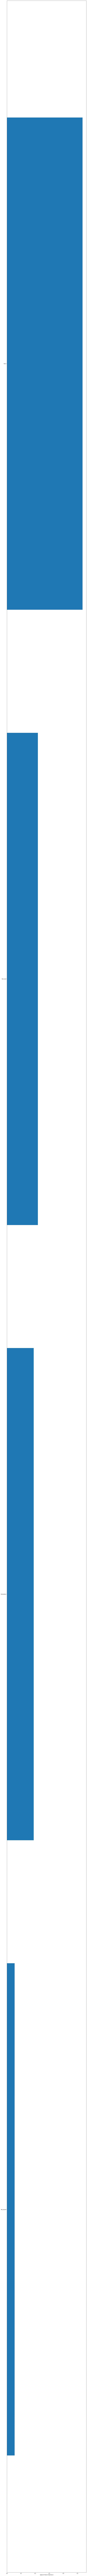

[CV 1/5] END learning_rate=0.01, max_depth=54, min_child_weight=2, n_estimators=340;, score=0.990 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=89, min_child_weight=6, n_estimators=120;, score=1.000 total time=   0.1s
[CV 1/5] END learning_rate=0.07, max_depth=36, min_child_weight=10, n_estimators=1000;, score=1.000 total time=   1.0s
[CV 4/5] END learning_rate=0.1, max_depth=69, min_child_weight=8, n_estimators=230;, score=1.000 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=23, min_child_weight=2, n_estimators=890;, score=1.000 total time=   0.3s
[CV 5/5] END learning_rate=0.05, max_depth=49, min_child_weight=8, n_estimators=340;, score=1.000 total time=   0.3s
[CV 1/5] END learning_rate=0.03, max_depth=23, min_child_weight=6, n_estimators=340;, score=1.000 total time=   0.3s
[CV 4/5] END learning_rate=0.03, max_depth=23, min_child_weight=6, n_estimators=340;, score=1.000 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=60, min_child_weight=4,

[CV 2/5] END learning_rate=0.03, max_depth=69, min_child_weight=6, n_estimators=890;, score=1.000 total time=   0.7s
[CV 2/5] END learning_rate=0.1, max_depth=93, min_child_weight=2, n_estimators=560;, score=1.000 total time=   0.2s
[CV 4/5] END learning_rate=0.03, max_depth=21, min_child_weight=8, n_estimators=1000;, score=1.000 total time=   0.9s
[CV 5/5] END learning_rate=0.03, max_depth=80, min_child_weight=2, n_estimators=560;, score=1.000 total time=   0.4s
[CV 2/5] END learning_rate=0.1, max_depth=61, min_child_weight=6, n_estimators=340;, score=1.000 total time=   0.2s
[CV 1/5] END learning_rate=0.03, max_depth=25, min_child_weight=4, n_estimators=1000;, score=1.000 total time=   0.7s
[CV 4/5] END learning_rate=0.1, max_depth=56, min_child_weight=6, n_estimators=450;, score=1.000 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=82, min_child_weight=4, n_estimators=10;, score=0.484 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=82, min_child_weight=4, n

[CV 5/5] END learning_rate=0.01, max_depth=104, min_child_weight=2, n_estimators=560;, score=1.000 total time=   0.4s
[CV 4/5] END learning_rate=0.1, max_depth=89, min_child_weight=6, n_estimators=120;, score=1.000 total time=   0.1s
[CV 4/5] END learning_rate=0.07, max_depth=36, min_child_weight=10, n_estimators=1000;, score=1.000 total time=   0.7s
[CV 1/5] END learning_rate=0.1, max_depth=69, min_child_weight=8, n_estimators=230;, score=1.000 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=69, min_child_weight=8, n_estimators=230;, score=1.000 total time=   0.2s
[CV 1/5] END learning_rate=0.05, max_depth=49, min_child_weight=8, n_estimators=340;, score=1.000 total time=   0.4s
[CV 3/5] END learning_rate=0.03, max_depth=25, min_child_weight=2, n_estimators=120;, score=0.993 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=84, min_child_weight=8, n_estimators=890;, score=0.998 total time=   0.8s
[CV 3/5] END learning_rate=0.03, max_depth=69, min_child_weight=

[CV 3/5] END learning_rate=0.03, max_depth=80, min_child_weight=2, n_estimators=560;, score=1.000 total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=61, min_child_weight=6, n_estimators=340;, score=1.000 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=61, min_child_weight=6, n_estimators=340;, score=1.000 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=85, min_child_weight=6, n_estimators=450;, score=1.000 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=85, min_child_weight=6, n_estimators=450;, score=1.000 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=56, min_child_weight=6, n_estimators=450;, score=1.000 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=87, min_child_weight=8, n_estimators=450;, score=1.000 total time=   0.3s
[CV 4/5] END learning_rate=0.03, max_depth=50, min_child_weight=8, n_estimators=780;, score=1.000 total time=   0.6s
[CV 1/5] END learning_rate=0.01, max_depth=54, min_child_weight=8, n_

In [31]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(500)
sorted_idx = rs.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rs.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

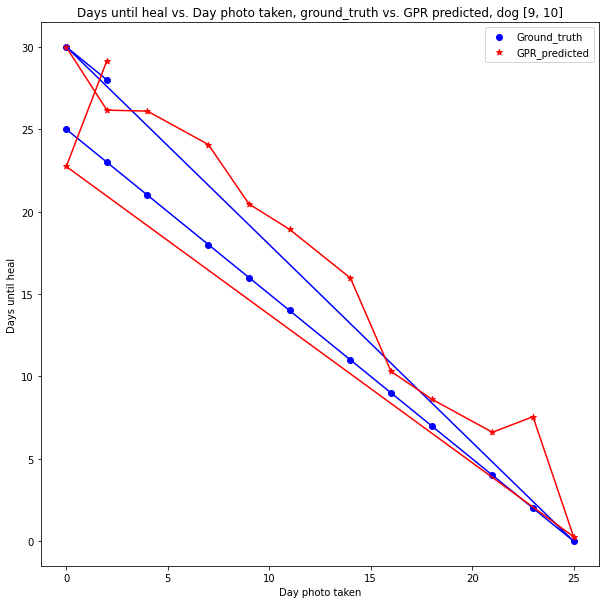

In [29]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = days_seq[14:28] , y = Y_test[14:28], color = 'blue', marker = 'o', label = "Ground_truth")
plt.plot(days_seq[14:28] , Y_test[14:28], linestyle='solid',color='blue')#, label='Ground_truth')

plt.scatter(x = days_seq[14:28] , y = Y_pred[14:28], color = 'red', marker = '*', label = "GPR_predicted")
plt.plot(days_seq[14:28] , Y_pred[14:28], linestyle='solid',color='red')#, label='GPR_predicted')

plt.title("Days until heal vs. Day photo taken, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Day photo taken")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
fig.savefig(fig_path + "ground_truth vs. GPR predicted,dog {},days until heal,connected_lines, 180rotation_images.png".format(test_num))

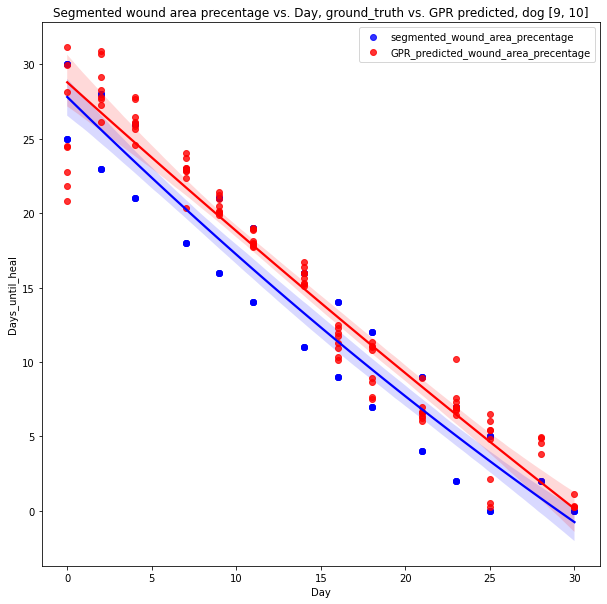

In [30]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=days_seq , y=Y_test, order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=days_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_wound_area_precentage', ax=ax)

ax.set(title='Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

fig.savefig(fig_path + "ground_truth vs. GPR predicted, dog {}, poly2_regression.png".format(test_num))

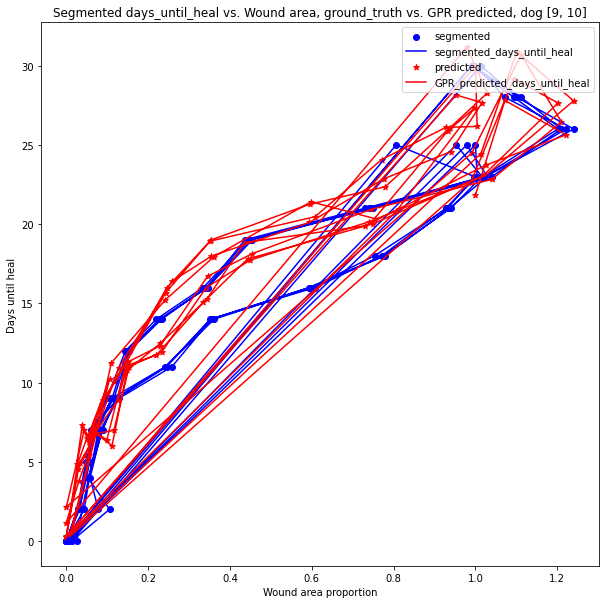

In [31]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = Area_prop_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
plt.plot(Area_prop_seq , Y_test, linestyle='solid',color='blue', label='segmented_days_until_heal')

plt.scatter(x = Area_prop_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
plt.plot(Area_prop_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_days_until_heal')

plt.title("Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Wound area proportion")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
#fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, connected_lines.png".format(test_num))

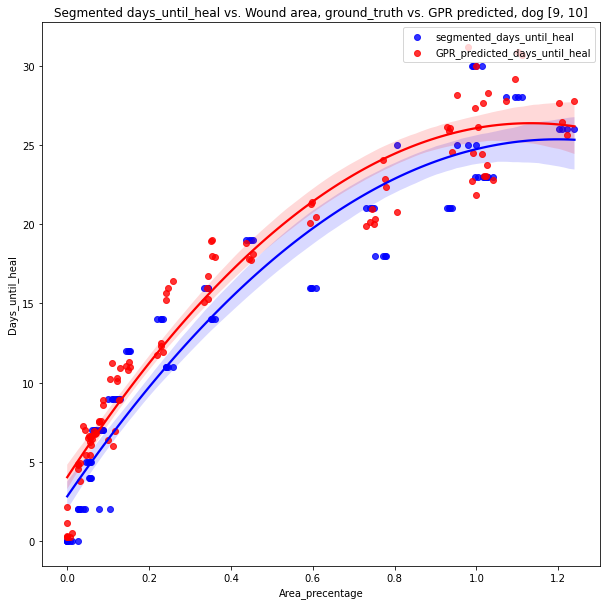

In [32]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=Area_prop_seq , y=Y_test, order = 2,
            color='blue', label='segmented_days_until_heal', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=Area_prop_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_days_until_heal', ax=ax)

ax.set(title='Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, poly2_regression.png".format(test_num))

# Gridsearch Params

In [33]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'learning_rate': [0.04, 0.05, 0.06], #so called `eta` value
              'max_depth': [57, 58, 59],
              'min_child_weight': [7,8,9],
              'n_estimators': [int(x) for x in range(840, 940, 10)]}
]
gp = XGBRegressor(random_state=r_seed)

# print parameters
print(gp.get_params())

# scores for regression
#
#Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 
#'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 
#'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 
#'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 
#'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 
#'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 
#'roc_auc', 'v_measure_score']

grid_gp = GridSearchCV(estimator = gp, cv=num_cv, param_grid=param_grid, n_jobs=-1, scoring = 'r2', verbose=2)
grid_gp.fit(X_train, Y_train)

print(grid_gp.best_params_)
gp = grid_gp.best_estimator_

print("The CV results are: ", grid_gp.best_score_)

# Make the prediction on test set.
Y_pred = gp.predict(X_test)
#print(Y_pred)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 2/5] END learning_rate=0.05, max_depth=

[CV 2/5] END learning_rate=0.1, max_depth=60, min_child_weight=4, n_estimators=890;, score=0.972 total time=  39.1s
[CV 3/5] END learning_rate=0.01, max_depth=63, min_child_weight=4, n_estimators=340;, score=0.958 total time=  17.3s
[CV 1/5] END learning_rate=0.1, max_depth=93, min_child_weight=2, n_estimators=560;, score=0.967 total time=  19.2s
[CV 4/5] END learning_rate=0.1, max_depth=93, min_child_weight=2, n_estimators=560;, score=0.959 total time=  24.2s
[CV 1/5] END learning_rate=0.07, max_depth=17, min_child_weight=4, n_estimators=670;, score=0.964 total time=  36.9s
[CV 4/5] END learning_rate=0.07, max_depth=17, min_child_weight=4, n_estimators=670;, score=0.952 total time=  33.8s
[CV 3/5] END learning_rate=0.03, max_depth=80, min_child_weight=2, n_estimators=560;, score=0.971 total time=  47.4s
[CV 4/5] END learning_rate=0.1, max_depth=61, min_child_weight=6, n_estimators=340;, score=0.961 total time=  27.0s
[CV 5/5] END learning_rate=0.03, max_depth=25, min_child_weight=4, n

[CV 1/5] END learning_rate=0.1, max_depth=56, min_child_weight=6, n_estimators=450;, score=0.966 total time=  29.6s
[CV 3/5] END learning_rate=0.05, max_depth=87, min_child_weight=8, n_estimators=450;, score=0.972 total time=  39.9s
[CV 1/5] END learning_rate=0.07, max_depth=4, min_child_weight=6, n_estimators=340;, score=0.968 total time=  11.2s
[CV 3/5] END learning_rate=0.07, max_depth=4, min_child_weight=6, n_estimators=340;, score=0.971 total time=  10.9s
[CV 1/5] END learning_rate=0.05, max_depth=69, min_child_weight=10, n_estimators=450;, score=0.967 total time=  30.8s
[CV 1/5] END learning_rate=0.01, max_depth=54, min_child_weight=8, n_estimators=1000;, score=0.966 total time= 1.0min
[CV 5/5] END learning_rate=0.01, max_depth=60, min_child_weight=2, n_estimators=670;, score=0.959 total time=  42.3s
[CV 1/5] END learning_rate=0.01, max_depth=52, min_child_weight=2, n_estimators=230;, score=0.918 total time=  12.0s
[CV 5/5] END learning_rate=0.01, max_depth=52, min_child_weight=2

[CV 4/5] END learning_rate=0.03, max_depth=80, min_child_weight=2, n_estimators=560;, score=0.959 total time=  39.6s
[CV 1/5] END learning_rate=0.1, max_depth=61, min_child_weight=6, n_estimators=340;, score=0.966 total time=  25.0s
[CV 4/5] END learning_rate=0.03, max_depth=25, min_child_weight=4, n_estimators=1000;, score=0.958 total time= 1.3min
[CV 1/5] END learning_rate=0.05, max_depth=87, min_child_weight=8, n_estimators=450;, score=0.970 total time=  38.2s
[CV 4/5] END learning_rate=0.03, max_depth=50, min_child_weight=8, n_estimators=780;, score=0.963 total time= 1.1min
[CV 5/5] END learning_rate=0.01, max_depth=54, min_child_weight=8, n_estimators=1000;, score=0.954 total time= 1.0min
[CV 4/5] END learning_rate=0.05, max_depth=95, min_child_weight=10, n_estimators=450;, score=0.958 total time=  33.9s
[CV 3/5] END learning_rate=0.01, max_depth=52, min_child_weight=2, n_estimators=230;, score=0.906 total time=  11.6s
[CV 1/5] END learning_rate=0.07, max_depth=13, min_child_weigh

[CV 4/5] END learning_rate=0.05, max_depth=74, min_child_weight=10, n_estimators=890;, score=0.958 total time=  36.5s
[CV] END learning_rate=0.04, max_depth=57, min_child_weight=7, n_estimators=840; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=57, min_child_weight=7, n_estimators=860; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=57, min_child_weight=7, n_estimators=870; total time= 1.1min
[CV] END learning_rate=0.04, max_depth=57, min_child_weight=7, n_estimators=890; total time= 1.4min
[CV] END learning_rate=0.04, max_depth=57, min_child_weight=7, n_estimators=900; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=57, min_child_weight=7, n_estimators=920; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=57, min_child_weight=7, n_estimators=930; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=57, min_child_weight=8, n_estimators=850; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=57, min_child_weight=8, n_estimators=870; t

[CV] END learning_rate=0.04, max_depth=58, min_child_weight=7, n_estimators=880; total time= 1.4min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=7, n_estimators=890; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=7, n_estimators=910; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=7, n_estimators=920; total time= 1.1min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=840; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=860; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=870; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=890; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=900; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=920; total time= 1.3min


[CV] END learning_rate=0.04, max_depth=58, min_child_weight=7, n_estimators=910; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=7, n_estimators=930; total time= 1.4min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=850; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=860; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=880; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=890; total time= 1.0min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=910; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=920; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=9, n_estimators=840; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=9, n_estimators=860; total time= 1.2min


[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=900; total time= 1.1min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=920; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=8, n_estimators=930; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=9, n_estimators=850; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=9, n_estimators=870; total time= 1.3min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=9, n_estimators=890; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=9, n_estimators=900; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=9, n_estimators=920; total time= 1.2min
[CV] END learning_rate=0.04, max_depth=58, min_child_weight=9, n_estimators=930; total time= 1.1min
[CV] END learning_rate=0.04, max_depth=59, min_child_weight=7, n_estimators=850; total time= 1.2min


[CV] END learning_rate=0.05, max_depth=58, min_child_weight=7, n_estimators=930; total time= 1.2min
[CV] END learning_rate=0.05, max_depth=58, min_child_weight=8, n_estimators=840; total time=  58.1s
[CV] END learning_rate=0.05, max_depth=58, min_child_weight=8, n_estimators=860; total time= 1.0min
[CV] END learning_rate=0.05, max_depth=58, min_child_weight=8, n_estimators=870; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=58, min_child_weight=8, n_estimators=890; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=58, min_child_weight=8, n_estimators=910; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=58, min_child_weight=8, n_estimators=920; total time= 1.1min
[CV] END learning_rate=0.05, max_depth=58, min_child_weight=9, n_estimators=840; total time= 1.1min
[CV] END learning_rate=0.05, max_depth=58, min_child_weight=9, n_estimators=850; total time= 1.2min
[CV] END learning_rate=0.05, max_depth=58, min_child_weight=9, n_estimators=870; total time= 1.3min


In [34]:
print("The CV results are: ", grid_gp.best_score_)

The CV results are:  0.9672266021106395


In [35]:
from sklearn.metrics import r2_score

# OG: [0:14], 180 degree: [14:28], 270 degree: [28:42], 90 degree: [42:56]
print(days_seq[14:28])

# Independent test images R2 score
print("Test set results are: ", r2_score(Y_test, Y_pred))

-10-CON-D00-R.png              0.0
-10-CON-D02-R.png              2.0
-10-CON-D04-R.png              4.0
-10-CON-D07-R.png              7.0
-10-CON-D09-R.png              9.0
-10-CON-D11-R.png             11.0
-10-CON-D14-R.png             14.0
-10-CON-D16-R.png             16.0
-10-CON-D18-R.png             18.0
-10-CON-D21-R.png             21.0
-10-CON-D23-R.png             23.0
-10-CON-D25-R.png             25.0
rotate180-09-CON-D00-R.png     0.0
rotate180-09-CON-D02-R.png     2.0
Name: Day, dtype: float64
Test set results are:  0.858658029150769


In [36]:
from sklearn.metrics import mean_squared_error

print('MSE:',mean_squared_error(Y_test, Y_pred))
print('RMSE:',mean_squared_error(Y_test, Y_pred, squared=False))


MSE: 11.13256197617818
RMSE: 3.3365494116194623


Text(0.5, 0, 'Xgboost Feature Importance')

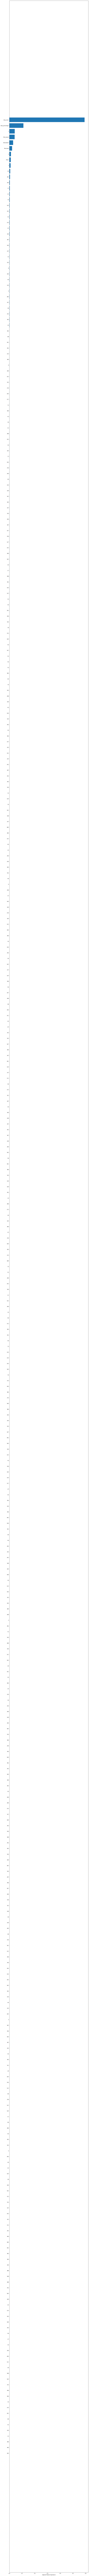

In [37]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(500)
sorted_idx = gp.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], gp.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [38]:
print(X_train.shape)
print(X_test.shape)
print(len(Y_train))

(440, 410)
(104, 410)
440


In [39]:
n = X_train.shape[0]
p = X_train.shape[1]
print(n, p)

440 410


In [40]:
Adj_r2 = 1 - (1-r2_score(Y_test, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print(Adj_r2)

-1.1396250069935303


In [41]:
  #  #calculate Adj R2
   # n= len(X_train)
   # p = i #len(X.columns)
   # adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
#     print(r2, adjustedr2)


[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=870; total time= 1.2min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=890; total time= 1.4min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=910; total time= 1.1min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=920; total time= 1.2min
[CV] END learning_rate=0.06, max_depth=57, min_child_weight=7, n_estimators=840; total time= 1.2min
[CV] END learning_rate=0.06, max_depth=57, min_child_weight=7, n_estimators=860; total time= 1.1min
[CV] END learning_rate=0.06, max_depth=57, min_child_weight=7, n_estimators=870; total time= 1.1min
[CV] END learning_rate=0.06, max_depth=57, min_child_weight=7, n_estimators=890; total time= 1.2min
[CV] END learning_rate=0.06, max_depth=57, min_child_weight=7, n_estimators=900; total time=  55.5s
[CV] END learning_rate=0.06, max_depth=57, min_child_weight=7, n_estimators=920; total time= 1.2min


[CV] END learning_rate=0.06, max_depth=59, min_child_weight=8, n_estimators=920; total time= 1.0min
[CV] END learning_rate=0.06, max_depth=59, min_child_weight=8, n_estimators=930; total time= 1.2min
[CV] END learning_rate=0.06, max_depth=59, min_child_weight=9, n_estimators=850; total time= 1.1min
[CV] END learning_rate=0.06, max_depth=59, min_child_weight=9, n_estimators=870; total time= 1.0min
[CV] END learning_rate=0.06, max_depth=59, min_child_weight=9, n_estimators=880; total time= 1.0min
[CV] END learning_rate=0.06, max_depth=59, min_child_weight=9, n_estimators=900; total time= 1.3min
[CV] END learning_rate=0.06, max_depth=59, min_child_weight=9, n_estimators=920; total time= 1.3min
[CV] END learning_rate=0.06, max_depth=59, min_child_weight=8, n_estimators=930; total time= 1.1min
[CV] END learning_rate=0.06, max_depth=59, min_child_weight=9, n_estimators=850; total time= 1.1min
[CV] END learning_rate=0.06, max_depth=59, min_child_weight=9, n_estimators=860; total time=  54.7s


[CV] END learning_rate=0.05, max_depth=59, min_child_weight=8, n_estimators=850; total time= 1.2min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=8, n_estimators=860; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=8, n_estimators=880; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=8, n_estimators=900; total time= 1.2min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=8, n_estimators=910; total time=  59.8s
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=8, n_estimators=930; total time= 1.1min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=840; total time= 1.2min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=860; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=880; total time= 1.2min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=890; total time= 1.2min


[CV] END learning_rate=0.05, max_depth=59, min_child_weight=8, n_estimators=920; total time= 1.1min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=840; total time= 1.1min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=850; total time= 1.2min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=870; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=890; total time= 1.1min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=900; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=59, min_child_weight=9, n_estimators=920; total time= 1.4min
[CV] END learning_rate=0.06, max_depth=57, min_child_weight=7, n_estimators=840; total time= 1.0min
[CV] END learning_rate=0.06, max_depth=57, min_child_weight=7, n_estimators=850; total time= 1.2min
[CV] END learning_rate=0.06, max_depth=57, min_child_weight=7, n_estimators=870; total time= 1.2min
